In [1]:
import sys
sys.path.append('../')
import jupman

import conf

conf.jm.init_icp()


# Pandas 2: operazioni avanzate

**Riferimenti:** [SoftPython - pandas 2](https://it.softpython.org/pandas/pandas2-advanced-sol.html)

* visualizza al meglio in <img style="display:inline; width:25px; vertical-align: middle;" src="../_static/img/chrome.png" alttext="Chrome">
* versione stampabile: [clicca qua](?print-pdf)
* per navigare nelle slide: premere `Esc`

<br>
<br>

**Summer School Data Science 2023 - Modulo 1 informatica:** [Moodle](https://didatticaonline.unitn.it/dol/course/view.php?id=36683) 

Docente: David Leoni david.leoni@unitn.it

Esercitatore: Luca Bosotti luca.bosotti@studenti.unitn.it


## Operazioni avanzate

**Raggruppare**

**Congiungere**

**GeoPandas** (cenni)

## Raggruppare

Torniamo nello spazio con il dataset [astropi.csv](astropi.csv)

Fonte: [ESA / Raspberry foundation](https://projects.raspberrypi.org/en/projects/astro-pi-flight-data-analysis) (abbiamo sostituito ROW_ID con time_stamp)

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('astropi.csv', encoding='UTF-8')

### Un raggruppamento:

### come fare l'istogramma di `humidity`?

1. **definire intervalli**
2. **come contare le occorrenze?**

1. intervalli: interi, es da `42.0` INCLUSO a `43.0` ESCLUSO

2. come contare / fare statistiche in genere: con `groupby` 

- nota: per istogrammi in particolare ci sono [modi più rapidi con numpy](https://stackoverflow.com/a/13130357)

### Un gruppo d'esempio

Il `42` quante righe ha?

In [3]:
df[ df['humidity'].transform(int) == 42].head()

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
19222,2016-02-18 16:37:00,33.18,28.96,26.51,42.99,1006.10,1.19,53.23,313.69,9.081925,-32.244905,-35.135448,-0.000581,0.018936,0.014607,0.000563,0.000346,-0.000113,0
19619,2016-02-18 17:43:50,33.34,29.06,26.62,42.91,1006.30,1.50,52.54,194.49,-53.197113,-4.014863,-20.257249,-0.000439,0.018838,0.014526,-0.000259,0.000323,-0.000181,0
19621,2016-02-18 17:44:10,33.38,29.06,26.62,42.98,1006.28,1.01,52.89,195.39,-52.911983,-4.207085,-20.754475,-0.000579,0.018903,0.014580,0.000415,-0.000232,0.000400,0
19655,2016-02-18 17:49:51,33.37,29.07,26.62,42.94,1006.28,0.93,53.21,203.76,-43.124080,-8.181511,-29.151436,-0.000432,0.018919,0.014608,0.000182,0.000341,0.000015,0
19672,2016-02-18 17:52:40,33.33,29.06,26.62,42.93,1006.24,1.34,52.71,206.97,-36.893841,-10.130503,-31.484077,-0.000551,0.018945,0.014794,-0.000378,-0.000013,-0.000101,0


In [4]:
df[ df['humidity'].transform(int) == 42].shape

(2776, 19)

### A ciascuno il suo gruppo

Creiamo una colonna che assegna a ciascuna riga il proprio gruppo:

In [5]:
df['humidity_int'] = df['humidity'].transform( lambda x: int(x) )

In [6]:

df[ ['time_stamp', 'humidity_int', 'humidity']  ].head()

,time_stamp,humidity_int,humidity
0,2016-02-16 10:44:40,44,44.94
1,2016-02-16 10:44:50,45,45.12
2,2016-02-16 10:45:00,45,45.12
3,2016-02-16 10:45:10,45,45.32
4,2016-02-16 10:45:20,45,45.18


### groupby


<div class="jupman-floating" data-jupman-style="position: absolute;
                                 right: 1vw;
                                 top: 35vh;">
    
**Calcoliamo la statistica desiderata per ogni gruppo:**
    
- prima la colonna su cui raggruppare `'humidity_int'`
- poi la colonna su cui effettuare la statistica `'humidity'`
- infine la statistica da calcolare, es `.count()` 
    - altre: `sum()`, `min()`, `max()`, media `mean()`...

</div>


In [7]:
df.groupby(['humidity_int'])['humidity'].count()

humidity_int
42     2776
43     2479
44    13029
45    32730
46    35775
47    14176
48     7392
49      297
50      155
51      205
52      209
53      128
54      224
55      164
56      139
57      183
58      237
59      271
60      300
Name: humidity, dtype: int64

### groupby - il risultato

In [8]:
risultato = df.groupby(['humidity_int'])['humidity'].count()

In [9]:
type(risultato)

pandas.core.series.Series

In [10]:
risultato.index

Int64Index([42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58,
            59, 60],
           dtype='int64', name='humidity_int')

### groupby - plottiamo

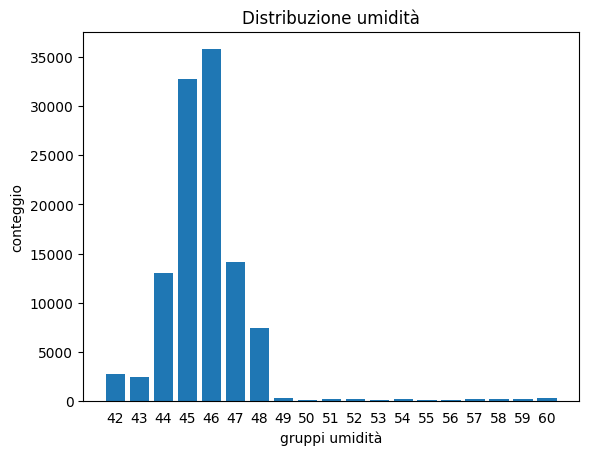

In [11]:
#jupman-purge-output
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.bar(risultato.index, 
        risultato)

plt.xlabel('gruppi umidità')
plt.ylabel('conteggio')
plt.title('Distribuzione umidità')

# mostra le etichette come interi
plt.xticks(risultato.index, 
           risultato.index) 
# rimuove le linette in fondo
plt.tick_params(bottom=False)
#jupman-purge
plt.savefig('img/astropi-humidity-histogram.png')
#/jupman-purge
plt.show()


<img src="img/astropi-humidity-histogram.png" 
     data-jupman-style="position: absolute;
                        right: 1vw;
                        top: 22%;
                        width: 47%;" >

### Problema: groupby produce poche righe

In [12]:
df.groupby(['humidity_int'])['humidity'].count()

humidity_int
42     2776
43     2479
44    13029
45    32730
46    35775
47    14176
48     7392
49      297
50      155
51      205
52      209
53      128
54      224
55      164
56      139
57      183
58      237
59      271
60      300
Name: humidity, dtype: int64

<div class="jupman-floating" data-jupman-style="position: absolute;
                                                width:40%;
                                                right: 5%;
                                                top: 40%;">
        
E se volessimo assegnare a ciascuna riga nella tabella originale il conteggio del proprio gruppo?
    
</div>    

### Per ogni riga, qual'è il conteggio del proprio gruppo?

In [13]:
df.groupby(['humidity_int'])['humidity'].transform('count')

0         13029
1         32730
2         32730
3         32730
4         32730
          ...  
110864     2776
110865     2776
110866     2776
110867     2776
110868     2776
Name: humidity, Length: 110869, dtype: int64

### Per ogni riga, salva il conteggio del proprio gruppo

In [14]:
nuova_colonna = df.groupby(['humidity_int'])['humidity'].transform('count')
df['Conteggio umidità'] = nuova_colonna

Verifichiamo:

In [15]:
df[['time_stamp', 'humidity_int', 'humidity', 'Conteggio umidità']]

,time_stamp,humidity_int,humidity,Conteggio umidità
0,2016-02-16 10:44:40,44,44.94,13029
1,2016-02-16 10:44:50,45,45.12,32730
2,2016-02-16 10:45:00,45,45.12,32730
3,2016-02-16 10:45:10,45,45.32,32730
4,2016-02-16 10:45:20,45,45.18,32730
...,...,...,...,...
110864,2016-02-29 09:24:21,42,42.94,2776
110865,2016-02-29 09:24:30,42,42.72,2776
110866,2016-02-29 09:24:41,42,42.83,2776
110867,2016-02-29 09:24:50,42,42.81,2776


## Esercizi raggruppamento

- [Esercizio Temperatura media meteo](https://it.softpython.org/pandas/pandas2-advanced-sol.html#1.4-Esercizio---Temperatura-media-del-meteo)
- [Beni culturali regione Umbria](https://it.softpython.org/pandas/pandas2-advanced-sol.html#1.5-Esercizio---Beni-culturali-Regione-Umbria)


## Congiungere dataset

Date due tabelle che condividono una colonna, come congiungere le righe?

In pandas si può usare `merge` (o `join`)

### Congiungere con `merge`: un esempio

il dataset [iss-coords.csv](iss-coords.csv) contiene le coordinate della International Space Station (ISS):

In [16]:
iss_coords = pd.read_csv('iss-coords.csv', encoding='UTF-8')
iss_coords.head(3)

,timestamp,lat,lon
0,2016-01-01 05:11:30,-45.103458,14.083858
1,2016-01-01 06:49:59,-37.597242,28.931170
2,2016-01-01 11:52:30,17.126141,77.535602


Come mostrare le coordinate della ISS nel dataset originale [astropi.csv](astropi.csv)?

In [17]:
df = pd.read_csv('astropi.csv', encoding='UTF-8')
df.head(3)

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
0,2016-02-16 10:44:40,31.88,27.57,25.01,44.94,1001.68,1.49,52.25,185.21,-46.422753,-8.132907,-12.129346,-0.000468,0.019439,0.014569,0.000942,0.000492,-0.000750,20
1,2016-02-16 10:44:50,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,-8.304243,-12.943096,-0.000614,0.019436,0.014577,0.000218,-0.000005,-0.000235,0
2,2016-02-16 10:45:00,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,-8.470832,-12.642772,-0.000569,0.019359,0.014357,0.000395,0.000600,-0.000003,0


### Congiungere con `merge`: proviamo!

In [18]:
# ricorda che merge produce un NUOVO dataframe:

df = pd.read_csv('astropi.csv', encoding='UTF-8')

geo_astropi = df.merge(iss_coords, left_on='time_stamp', right_on='timestamp')

# merge aggiunge sia la colonna time_stamp che timestamp,
# perciò rimuoviamo la colonna duplicata 'timestamp'

geo_astropi = geo_astropi.drop('timestamp', axis=1)
geo_astropi

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,...,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,lat,lon
0,2016-02-19 03:49:00,32.53,28.37,25.89,45.31,1006.04,1.31,51.63,34.91,21.125001,...,-14.474195,-0.000667,0.018851,0.014607,0.000060,-0.000304,0.000046,0,31.434741,52.917464
1,2016-02-19 14:30:40,32.30,28.12,25.62,45.57,1007.42,1.49,52.29,333.49,16.083471,...,-7.290281,-0.000563,0.018687,0.014502,0.000208,-0.000499,0.000034,0,-46.620658,-57.311657
2,2016-02-19 14:30:40,32.30,28.12,25.62,45.57,1007.42,1.49,52.29,333.49,16.083471,...,-7.290281,-0.000563,0.018687,0.014502,0.000208,-0.000499,0.000034,0,-46.620477,-57.311138
3,2016-02-21 22:14:11,32.21,28.05,25.50,47.36,1012.41,0.67,52.40,27.57,15.441683,...,2.230845,-0.000584,0.018800,0.014136,-0.000015,-0.000159,0.000221,0,19.138359,-140.211489
4,2016-02-23 23:40:50,32.32,28.18,25.61,47.45,1010.62,1.14,51.41,33.68,11.994554,...,1.171099,-0.000659,0.018276,0.014124,0.000368,0.000368,0.000030,0,4.713819,80.261665
5,2016-02-24 10:05:51,32.39,28.26,25.70,46.83,1010.51,0.61,51.91,287.86,6.554283,...,-15.700529,-0.000647,0.018352,0.014344,-0.000664,-0.000518,0.000171,0,-46.061583,22.246025
6,2016-02-25 00:23:01,32.38,28.18,25.62,46.52,1008.28,0.90,51.77,30.80,9.947132,...,-1.494121,-0.000663,0.018502,0.014366,0.000290,0.000314,-0.000375,0,47.047346,137.958918
7,2016-02-27 01:43:10,32.42,28.34,25.76,45.72,1006.79,0.57,49.85,10.57,7.805606,...,-4.886117,-0.000624,0.017930,0.014378,-0.000026,-0.000013,-0.000047,0,-41.049112,30.193004
8,2016-02-27 01:43:10,32.42,28.34,25.76,45.72,1006.79,0.57,49.85,10.57,7.805606,...,-4.886117,-0.000624,0.017930,0.014378,-0.000026,-0.000013,-0.000047,0,-8.402991,-100.981726
9,2016-02-28 09:48:40,32.62,28.62,26.02,45.15,1006.06,1.12,50.44,301.74,10.348327,...,-13.590825,-0.000590,0.017620,0.014725,-0.000358,-0.000301,-0.000061,0,50.047523,175.566751


## Esercizio - migliorare merge

La tabella di prima ha le colonne `lat` e `lon`...

... ma pochissime righe! Perchè? 

**Prova a fondere le tabelle in qualche modo utile in modo da avere tutte le righe originali e tutte le celle di lat e lon riempite.**

- Per altre strategie di `merge`, leggi l’attributo `how` in [Why And How To Use Merge With Pandas in Python](https://towardsdatascience.com/why-and-how-to-use-merge-with-pandas-in-python-548600f7e738)

- Per riempire valori mancanti non usare tecniche di interpolazione, semplicemente metti la posizione della stazione in quel dato giorno o ora.

[Discussione e soluzione](https://it.softpython.org/pandas/pandas2-advanced-sol.html#2.-Congiungere-tabelle)

## GeoPandas (menzione)

GeoPandas è un'estensione di pandas per agevolare l'utilizzo e visualizzazione di forme geometriche e geografiche nel dataframe:

![italy population](img/italy-population.png)

Se vi interessa:

**su SoftPython**: [c'è una sezione ](https://it.softpython.org/pandas/pandas2-advanced-sol.html#3.-GeoPandas) ma è più che altro una bozza

**Per tanti bei tutorial completi online**: raccomando il materiale (in inglese) dal sito [Geospatial Analysis and Representation for Data Science](https://napo.github.io/geospatial_course_unitn/) del relativo corso tenuto da Maurizio Napolitano (FBK) al master in Data Science all’Università di Trento.

In [19]:
#jupman-purge-io
# scrivi qui
''

''